In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
def convertData(data, column, leftShift):
    for i in range(len(data)):
        temp = data.loc[i, column]
        unsigned = int(temp,16)

        if unsigned & (1 << 15) !=0:
            unsigned = -1*((1<<15)-(unsigned &((1<<15)-1)))
        
        data.loc[i,column] = unsigned / (1<< leftShift)
    return data

def convertDataHex(data, column, leftShift):
    for i in range(len(data)):
        temp = data.loc[i, column]
        unsigned = int(temp,16)

        #if unsigned & (1 << 15) !=0:
        #unsigned = -1*((1<<15)-(unsigned &((1<<15)-1)))
        
        data.loc[i,column] = unsigned# / (1<< leftShift)
    return data

def _str_to_int(data, column):
    """ Transform hex str into int. """
    for i in range(len(data)):
        temp = data.loc[i, column]
        unsigned = int(temp,16)
        if unsigned >= 2**7:
            unsigned -= 2**8
        data.loc[i,column] = unsigned
    
    return data

# Conversio dades de temps a timestamp
def dateChange(data):
    fin = data.shape[0]
    i=0

    while i < fin:
        now = ("06/02/2022 " + data.at[i,"time"])
        date = datetime.strptime(now, "%m/%d/%Y %H:%M:%S.%f")
        timestamp = datetime.timestamp(date)
        data.at[i,"time"]= timestamp
        i=i+1


def all_non_consecutive(arr):
    ans = []
    start = arr[0]
    index = 0
    for number in arr:
        if start == number:
            start += 1
            index += 1
            continue

        ans.append({'i': index, 'n': number})
        start = number + 1
        index += 1

    return ans

In [3]:
def grafica(llista):
    temp = all_non_consecutive(llista)
    llista_resultat=[]
    aux_llista=[]
    aux_llista.append(llista[0])
    for i in temp:
        aux_llista.append(llista[i["i"]-1])
        aux_llista.append(i["n"])
    aux_llista.append(llista[-1])

    print(aux_llista)
    i=0
    while i < len(aux_llista):
        #balance_test.loc[aux_llista[i]:aux_llista[i+1]].plot(subplots=True, layout=())
        #new_df = balance_test[["accelerometerX","accelerometerY","accelerometerZ"]]
        new_df = balance_test.loc[aux_llista[i]:aux_llista[i+1]]
        new_df.reset_index(inplace=True, drop=True)
        llista_resultat.append(new_df)
        i=i+2
    return llista_resultat


In [4]:
dades = pd.read_csv("C:/Users/usuario/Desktop/Uni/Dades/Mataro_postu_IMU/ID_vm54f_DATA_15-03-2023_HORA_17-07-28.351.csv", delimiter=";")
dades

,time,id,test,action,accelerometerX,accelerometerY,accelerometerZ,gyroscopeX,gyroscopeY,gyroscopeZ,...,compassZ,gravityVectorX,gravityVectorY,gravityVectorZ,quaternionW,quaternionX,quaternionY,quaternionZ,steps,timeSteps
0,1678895197541,vm54f,0,0,FBDB,000A,FFC9,FFF5,FDDF,FF7B,...,0000,C11C5009,3F585BF6,BDFAAEB8,1698BAB7,29323536,1366C86A,D91E0EAE,NaN,NaN
1,1678895197569,vm54f,0,0,FC07,002C,FFB5,000E,FDF1,FF5A,...,0000,C11C5D85,3F4FC745,BD89E7F1,1699F9E5,290B7A54,136D1937,D8F90BCD,NaN,NaN
2,1678895197572,vm54f,0,0,FC08,0042,FFA9,FFFB,FE85,FF94,...,FE1B,C11C6B01,3F4629CD,BC21CF4A,16943099,28E5098F,136F2071,D8CE718E,NaN,NaN
3,1678895197592,vm54f,0,0,FBF0,0045,FF8F,FFE9,FE47,FFBF,...,0000,C11C725C,3F4039C5,3CD2D7CD,1647637A,28F10CD5,13241B6D,D88A58F4,NaN,NaN
4,1678895197618,vm54f,0,0,FC20,0029,FF77,003B,FDB0,FFF0,...,0000,C11C7609,3F3CD0FB,3D57BF0E,1646EE54,28DFE65C,13232CCB,D877E086,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50066,1678896448018,vm54f,0,0,FC11,0050,000D,FF3F,0018,FFEF,...,0000,C11C7433,3F3EB181,3CC695AD,F43EA36F,2AA25733,F0FDF8D3,D43D8907,NaN,NaN
50067,1678896448052,vm54f,0,0,FC06,0048,0006,FF45,0005,FFDB,...,0000,C11C7396,3F3F09C4,3CD0642D,F44E0A23,2AA67EF2,F10BC6C4,D438BBB7,NaN,NaN
50068,1678896448082,vm54f,0,0,FC01,0046,FFFF,FF5D,FFF3,FFDB,...,0185,C11C756D,3F3DA8BA,3CBE00FC,F459FE3E,2AADD9DD,F11CBE94,D436EEB5,NaN,NaN
50069,1678896448104,vm54f,0,0,FC01,004F,FFF8,FF70,0018,FFC8,...,0000,C11C77E0,3F3BBE64,3CB0850B,F43B5F0F,2AA718E3,F106975B,D4401927,NaN,NaN


In [5]:
#print(dades["time"])
convertData(dades,"accelerometerX",10)
convertData(dades,"accelerometerY",10)
convertData(dades,"accelerometerZ",10)

convertDataHex(dades,"gravityVectorX",10)
convertDataHex(dades,"gravityVectorY",10)
convertDataHex(dades,"gravityVectorZ",10)

convertDataHex(dades,"quaternionW",10)
convertDataHex(dades,"quaternionX",10)
convertDataHex(dades,"quaternionY",10)
convertDataHex(dades,"quaternionZ",10)

convertDataHex(dades,"gyroscopeX",10)
convertDataHex(dades,"gyroscopeY",10)
convertDataHex(dades,"gyroscopeZ",10)
#print(dades)

,time,id,test,action,accelerometerX,accelerometerY,accelerometerZ,gyroscopeX,gyroscopeY,gyroscopeZ,...,compassZ,gravityVectorX,gravityVectorY,gravityVectorZ,quaternionW,quaternionX,quaternionY,quaternionZ,steps,timeSteps
0,1678895197541,vm54f,0,0,-1.036133,0.009766,-0.053711,65525,64991,65403,...,0000,3239858185,1062755318,3187322552,379108023,691156278,325503082,3642625710,NaN,NaN
1,1678895197569,vm54f,0,0,-0.993164,0.042969,-0.073242,14,65009,65370,...,0000,3239861637,1062192965,3179931633,379189733,688618068,325916983,3640200141,NaN,NaN
2,1678895197572,vm54f,0,0,-0.992188,0.064453,-0.084961,65531,65157,65428,...,FE1B,3239865089,1061562829,3156332362,378810521,686098831,326049905,3637408142,NaN,NaN
3,1678895197592,vm54f,0,0,-1.015625,0.067383,-0.110352,65513,65095,65471,...,0000,3239866972,1061173701,1020450765,373777274,686886101,321133421,3632945396,NaN,NaN
4,1678895197618,vm54f,0,0,-0.96875,0.040039,-0.133789,59,64944,65520,...,0000,3239867913,1060950267,1029160718,373747284,685762140,321072331,3631734918,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50066,1678896448018,vm54f,0,0,-0.983398,0.078125,0.012695,65343,24,65519,...,0000,3239867443,1061073281,1019647405,4097745775,715282227,4043176147,3560802567,NaN,NaN
50067,1678896448052,vm54f,0,0,-0.994141,0.070312,0.005859,65349,5,65499,...,0000,3239867286,1061095876,1020290093,4098755107,715554546,4044080836,3560487863,NaN,NaN
50068,1678896448082,vm54f,0,0,-0.999023,0.068359,-0.000977,65373,65523,65499,...,0185,3239867757,1061005498,1019085052,4099538494,716036573,4045192852,3560369845,NaN,NaN
50069,1678896448104,vm54f,0,0,-0.999023,0.077148,-0.007812,65392,24,65480,...,0000,3239868384,1060879972,1018201355,4097531663,715593955,4043741019,3560970535,NaN,NaN


In [6]:

balance_test = dades.loc[dades["test"]==5, ["action","accelerometerX","accelerometerY","accelerometerZ", "gravityVectorX", "gravityVectorY", "gravityVectorZ", "gyroscopeX", "gyroscopeY", "gyroscopeZ"]]

llista_ROA = balance_test.index[balance_test["action"] == 1].tolist()
llista_ROC = balance_test.index[balance_test["action"] == 2].tolist()
llista_RGA = balance_test.index[balance_test["action"] == 3].tolist()
llista_RGC = balance_test.index[balance_test["action"] == 4].tolist()
balance_test.drop("action", inplace=True, axis=1)


In [7]:
def find_discontinuity(lst):
    for i in range(1, len(lst)):
        if lst[i] != lst[i - 1] + 1:
            return i, lst[i - 1] + 1

    return None

In [8]:
result = find_discontinuity(llista_ROA)

if result:
    index, missing_value = result
    print(f"Discontinuity found at index {index}, missing value is {missing_value}.")
else:
    print("No discontinuity found.")

Discontinuity found at index 1180, missing value is 2607.


In [9]:
index, missing_value = find_discontinuity(llista_ROA)
ROA1 = [*range(llista_ROA[0], missing_value)]

index, missing_value = find_discontinuity(llista_ROC)
ROC1 = [*range(llista_ROC[0], missing_value)]

index, missing_value = find_discontinuity(llista_RGA)
RGA1 = [*range(llista_RGA[0], missing_value)]

index, missing_value = find_discontinuity(llista_RGC)
RGC1 = [*range(llista_RGC[0], missing_value)]

In [10]:
resultat=[]
resultat=grafica(ROC1)

[2820, 4010]


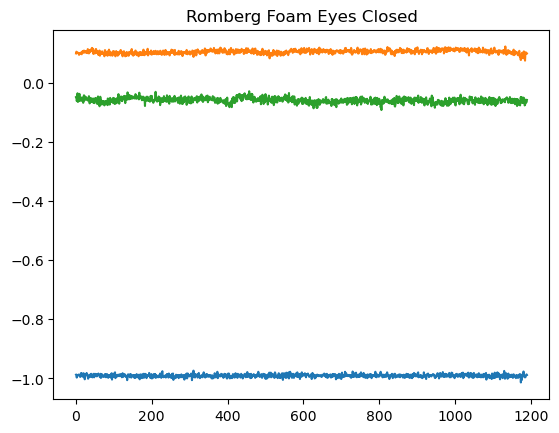

In [11]:
x=0
#for i in resultat:
    #i.plot(ax=axes[1,x] ,title="Espuma Ulls tancats")
resultat[0]["accelerometerX"].plot(title="Romberg Foam Eyes Closed")
resultat[0]["accelerometerY"].plot(title="Romberg Foam Eyes Closed")
resultat[0]["accelerometerZ"].plot(title="Romberg Foam Eyes Closed")

plt.show()

## Comparació força posturògraf amb forces IMU(Normalitzades)

In [12]:
from sklearn.preprocessing import normalize
import numpy as np
from sklearn.preprocessing import normalize

In [13]:
if True:
    reader = pd.read_csv("C:/Users/usuario/Desktop/Uni/Dades/Mataro_postu_IMU/2023031504_sve_VM54F.txt", delimiter="\t", encoding="ansi", chunksize=1)
    df_dades = reader.get_chunk()
    #print(df_dades)
    #print(df_dades.columns)
    print(df_dades['Val_ROA'])
    Val_ROA = df_dades['Val_ROA'].item()
    
    print(df_dades['Val_ROC'])
    Val_ROC = df_dades['Val_ROC'].item()
    
    print(df_dades['Val_RGA'])
    Val_RGA = df_dades['Val_RGA'].item()
    
    print(df_dades['Val_RGC'])
    Val_RGC = df_dades['Val_RGC'].item()
    
    print(df_dades['Indice_SOM'])
    print(df_dades['Indice_VEST'])
    print(df_dades['Indice_VIS'])
    
    masa = df_dades['Peso (Kg)']
    """
    count=0
    for i in df_dades.columns:
        print(i, count)
        count+=1
    """


#reader = pd.read_csv("../../dades/dades posturograf/2022071305_sve_FJ52F.txt", delimiter="\t", encoding="ansi", chunksize=2)
reader = pd.read_csv("C:/Users/usuario/Desktop/Uni/Dades/Mataro_postu_IMU/2023031504_sve_VM54F.txt", delimiter="\t", encoding="ansi", skiprows=1, chunksize=1, header=None)


df_dades = reader.get_chunk()
#print(df_dades)
#print(df_dades.columns)
#num_test = df_dades[['Nº_ROA','Nº_ROC','Nº_RGA','Nº_RGC']].values.tolist()

#'Nº_test', 'Val_test',Rep_test', 'EstML_test', 'EstAP_test'
roa = df_dades.iloc[:,16:21].values.tolist()
roc = df_dades.iloc[:,21:26].values.tolist()
rga = df_dades.iloc[:,26:31].values.tolist()
rgc = df_dades.iloc[:,31:36].values.tolist()

##SOM VIS VEST
result = df_dades.iloc[:,53:56].values.tolist()

print(roa)
print(roc)
print(rga)
print(rgc)
print(result)

num_test = roa[0][0] + roc[0][0] + rga[0][0] + rgc[0][0]
print("Total tests")
print(num_test)

2023031504  ANA    100.0
Name: Val_ROA, dtype: float64
2023031504  ANA    100.0
Name: Val_ROC, dtype: float64
2023031504  ANA    100.0
Name: Val_RGA, dtype: float64
2023031504  ANA    0.0
Name: Val_RGC, dtype: float64
2023031504  ANA    0.0
Name: Indice_SOM, dtype: float64
2023031504  ANA    -
Name: Indice_VEST, dtype: object
2023031504  ANA    0.0
Name: Indice_VIS, dtype: float64
[[3.0, 100.0, 64.82313, 100.0, 100.0]]
[[3.0, 100.0, 64.410715, 100.0, 100.0]]
[[2.0, 100.0, 100.0, 100.0, 100.0]]
[[2.0, 0.0, 67.411831, 0.0, 0.0]]
[[100.0, 98.864108, 0.0]]
Total tests
10.0


In [14]:
df_dades_postu_FxFy  = pd.read_csv("C:/Users/usuario/Desktop/Uni/Dades/Mataro_postu_IMU/2023031504_sve_VM54F.txt", delimiter="\t", encoding="ansi",skiprows=(17+int(num_test)+1+1200), index_col=False, nrows = 1200)

### Força posturógraf

In [15]:
df_dades_postu_FxFy.columns

Index(['ROA1_Fx', 'ROA1_Fy', 'ROC2_Fx', 'ROC2_Fy', 'ROA3_Fx', 'ROA3_Fy',
       'ROC4_Fx', 'ROC4_Fy', 'ROA5_Fx', 'ROA5_Fy', 'ROC6_Fx', 'ROC6_Fy',
       'RGA7_Fx', 'RGA7_Fy', 'RGC8_Fx', 'RGC8_Fy', 'RGA9_Fx', 'RGA9_Fy',
       'RGC10_Fx', 'RGC10_Fy', 'Unnamed: 20'],
      dtype='object')

In [16]:
Test = 'RGC10_'

In [17]:
Fx_norm = normalize([np.array(df_dades_postu_FxFy[Test + 'Fx'])])
Fy_norm = normalize([np.array(df_dades_postu_FxFy[Test + 'Fy'])])

llista = list(range(0,len(Fx_norm[0])))

Diferència forces en x:  0.12752635737302967
Diferència forces en y:  0.23399826257883838


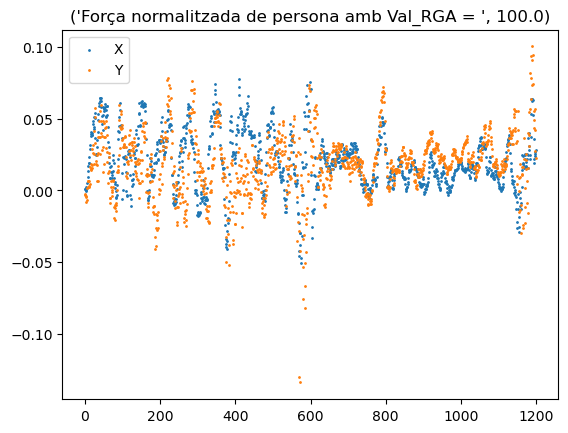

In [18]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(llista, Fx_norm[0], s = 1, label="X")
ax1.scatter(llista, Fy_norm[0], s = 1, label="Y")
#ax1.set_title(("Força normalitzada de persona amb Val_ROA = ", Val_ROA))
#ax1.set_title(("Força normalitzada de persona amb Val_ROC = ", Val_ROC))
ax1.set_title(("Força normalitzada de persona amb Val_RGA = ", Val_RGA))
#ax1.set_title(("Força normalitzada de persona amb Val_RGC = ", Val_RGC))

print("Diferència forces en x: ", max(Fx_norm[0]) - min(Fx_norm[0]))
print("Diferència forces en y: ", max(Fy_norm[0]) - min(Fy_norm[0]))

plt.legend()

plt.show()

### Accelerómetre 

In [37]:
resultat=[]
resultat=grafica(RGA1)

[12131, 13386]


In [33]:
Fz_norm_IMU = normalize([resultat[0]["accelerometerZ"]*masa.item()*9.81]) 
Fx_norm_IMU = normalize([resultat[0]["accelerometerX"]*masa.item()*9.81]) 
Fy_norm_IMU = normalize([resultat[0]["accelerometerY"]*masa.item()*9.81]) 

llista = list(range(0,len(Fz_norm_IMU[0])))

Diferència forces en z:  0.03035491721464971
Diferència forces en y:  0.01328319072494965


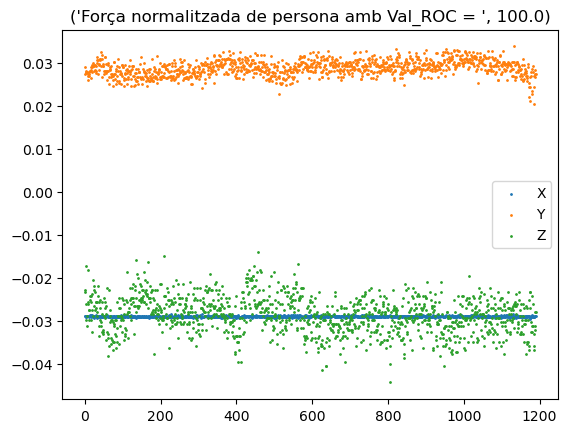

In [34]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(llista, Fx_norm_IMU[0], s = 1, label="X")
ax1.scatter(llista, Fy_norm_IMU[0], s = 1, label="Y")
ax1.scatter(llista, Fz_norm_IMU[0], s = 1, label="Z")
#ax1.set_title(("Força normalitzada de persona amb Val_ROA = ", Val_ROA))
ax1.set_title(("Força normalitzada de persona amb Val_ROC = ", Val_ROC))
#ax1.set_title(("Força normalitzada de persona amb Val_RGA = ", Val_RGA))
#ax1.set_title(("Força normalitzada de persona amb Val_RGC = ", Val_RGC))

print("Diferència forces en z: ", max(Fz_norm_IMU[0]) - min(Fz_norm_IMU[0]))
print("Diferència forces en y: ", max(Fy_norm_IMU[0]) - min(Fy_norm_IMU[0]))

plt.legend()

plt.show()

### Vector Gravity

In [38]:
Fz_norm_IMU_gravity = normalize([resultat[0]["gravityVectorZ"]*masa.item()])
Fx_norm_IMU_gravity = normalize([resultat[0]["gravityVectorX"]*masa.item()])
Fy_norm_IMU_gravity = normalize([resultat[0]["gravityVectorY"]*masa.item()])

llista = list(range(0,len(Fz_norm_IMU_gravity[0])))

Diferència forces en z:  0.00022666777577539515
Diferència forces en y:  0.0002039048812733403


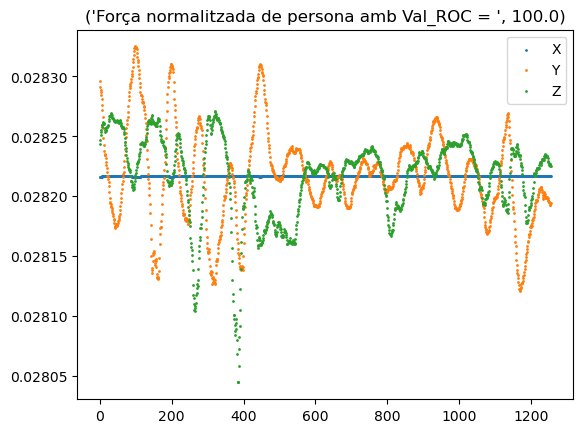

In [39]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(llista, Fx_norm_IMU_gravity[0], s = 1, label="X")
ax1.scatter(llista, Fy_norm_IMU_gravity[0], s = 1, label="Y")
ax1.scatter(llista, Fz_norm_IMU_gravity[0], s = 1, label="Z")
#ax1.set_title(("Força normalitzada de persona amb Val_ROA = ", Val_ROA))
ax1.set_title(("Força normalitzada de persona amb Val_ROC = ", Val_ROC))
#ax1.set_title(("Força normalitzada de persona amb Val_RGA = ", Val_RGA))
#ax1.set_title(("Força normalitzada de persona amb Val_RGC = ", Val_RGC))

print("Diferència forces en z: ", max(Fz_norm_IMU_gravity[0]) - min(Fz_norm_IMU_gravity[0]))
print("Diferència forces en y: ", max(Fy_norm_IMU_gravity[0]) - min(Fy_norm_IMU_gravity[0]))

plt.legend()

plt.show()

### Giroscopi

In [24]:
Gz_norm_IMU = normalize([resultat[0]["gyroscopeZ"]])
Gx_norm_IMU = normalize([resultat[0]["gyroscopeX"]])
Gy_norm_IMU = normalize([resultat[0]["gyroscopeY"]])

llista = list(range(0,len(Gz_norm_IMU[0])))

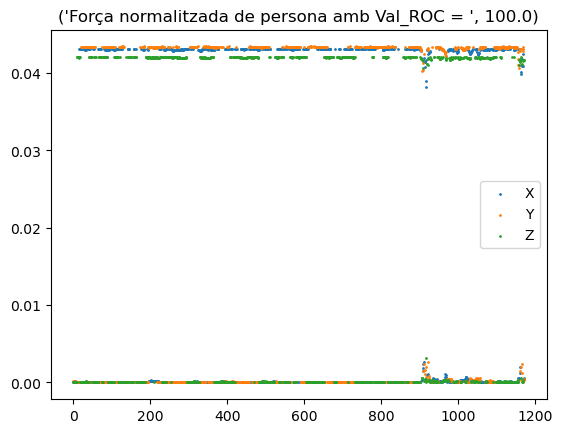

In [25]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(llista, Gx_norm_IMU[0], s = 1, label="X")
ax1.scatter(llista, Gy_norm_IMU[0], s = 1, label="Y")
ax1.scatter(llista, Gz_norm_IMU[0], s = 1, label="Z")
#ax1.set_title(("Força normalitzada de persona amb Val_ROA = ", Val_ROA))
ax1.set_title(("Força normalitzada de persona amb Val_ROC = ", Val_ROC))
#ax1.set_title(("Força normalitzada de persona amb Val_RGA = ", Val_RGA))
#ax1.set_title(("Força normalitzada de persona amb Val_RGC = ", Val_RGC))

plt.legend()

plt.show()

## Representació quaternions